In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

M : having memory
I : Iterative training(fine tuning over time)
D : having Deviation_score
B : having Blending
O : means nothing(normal GNN)


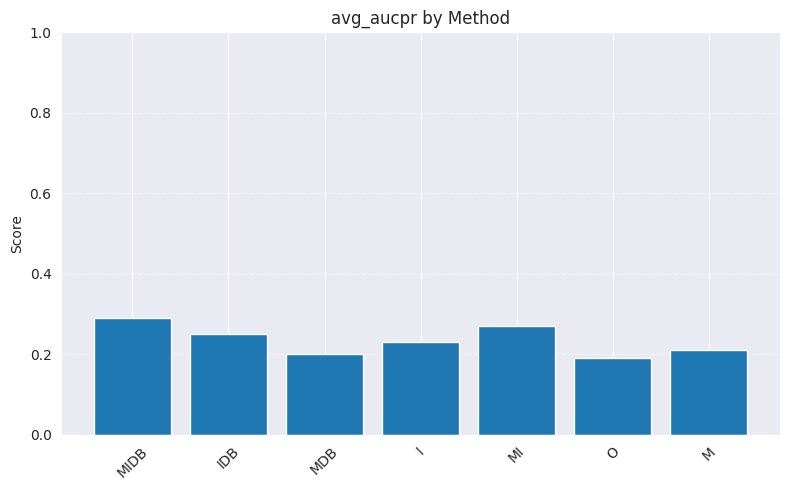

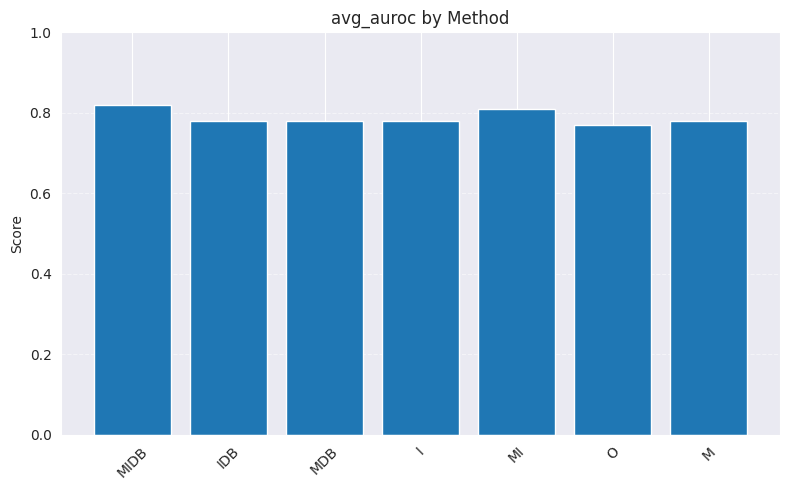

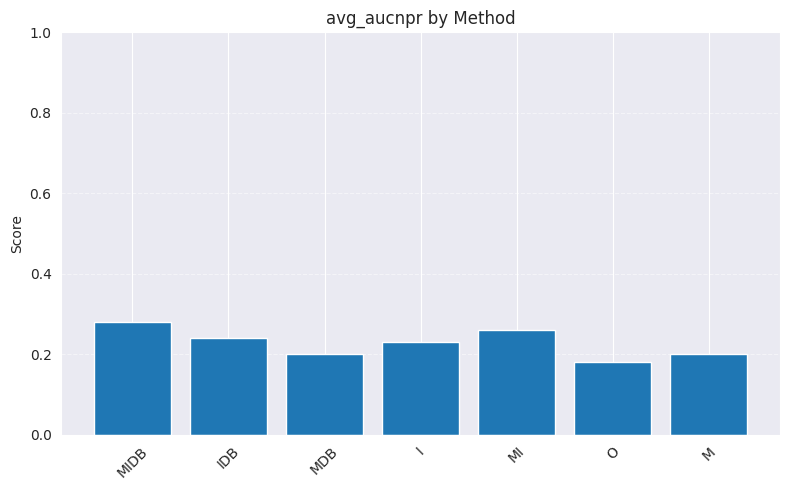

In [2]:
## EllipticPP
data = {
    'MIDB': (0.29, 0.82, 0.28),
    'IDB': (0.25, 0.78, 0.24),
    'MDB': (0.20, 0.78, 0.20),
    'I': (0.23, 0.78, 0.23),
    'MI': (0.27, 0.81, 0.26),
    'O': (0.19, 0.77, 0.18),
    # 'Roland': (0.23, 0.82, 0.22),
    'M': (0.21, 0.78, 0.20)
}
df = pd.DataFrame.from_dict(data, orient='index', columns=['avg_aucpr', 'avg_auroc', 'avg_aucnpr'])
df.index.name = 'method'
df = df.reset_index()

metrics = ['avg_aucpr', 'avg_auroc', 'avg_aucnpr']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    df_plot = df[['method', metric]].dropna()
    plt.bar(df_plot['method'], df_plot[metric])
    plt.title(f'{metric} by Method')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
## SAML
data = {
    'O':  (0.005, 0.72, 0.004),
    'MIDB': (0.014, 0.90, 0.013),
    'MDB':  (0.007, 0.79, 0.007),
    'IDB':  (0.012, 0.87, 0.011),
    'MI':  (0.013, 0.87, 0.012),
    'I':   (0.009, 0.84, 0.009),
    'M': (0.006, 0.76, 0.005)
}
df = pd.DataFrame.from_dict(data, orient='index', columns=['avg_aucpr', 'avg_auroc', 'avg_aucnpr'])
df.index.name = 'method'
df = df.reset_index()

metrics = ['avg_aucpr', 'avg_auroc', 'avg_aucnpr']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    df_plot = df[['method', metric]].dropna()
    plt.bar(df_plot['method'], df_plot[metric])
    plt.title(f'{metric} by Method')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_279566/1221194320.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


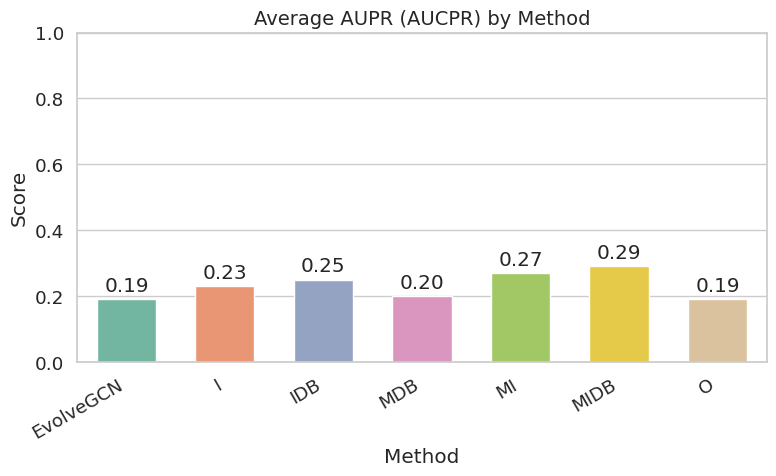

/tmp/ipykernel_279566/1221194320.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


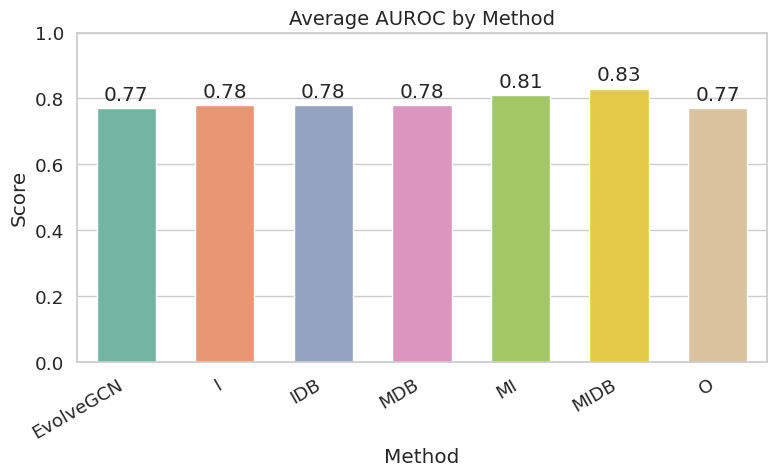

/tmp/ipykernel_279566/1221194320.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


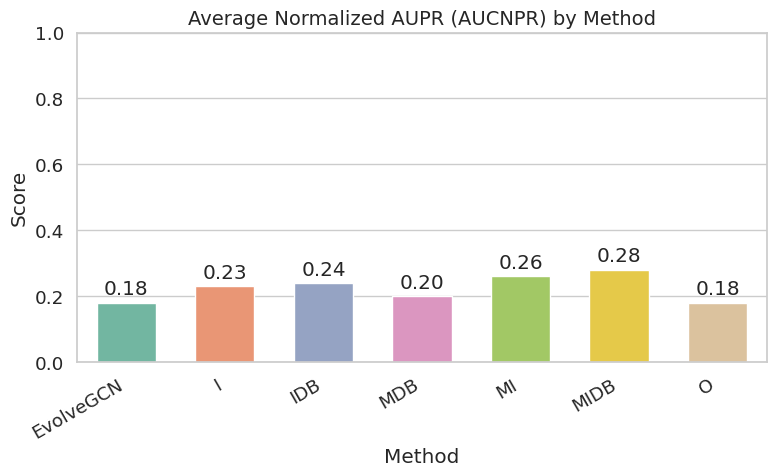

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data
data = {
    'MIDB': (0.29, 0.83, 0.28),
    'IDB': (0.25, 0.78, 0.24),
    'MDB': (0.20, 0.78, 0.20),
    'I': (0.23, 0.78, 0.23),
    'MI': (0.27, 0.81, 0.26),
    'O': (0.19, 0.77, 0.18),
    'EvolveGCN': (0.19, 0.77, 0.18),
}
df = pd.DataFrame.from_dict(data, orient='index', columns=['avg_aucpr', 'avg_auroc', 'avg_aucnpr'])
df.index.name = 'method'
df = df.reset_index()

df = df.sort_values('method', key=lambda s: s.str.lower()).reset_index(drop=True)

metrics = ['avg_aucpr', 'avg_auroc', 'avg_aucnpr']
metric_titles = {
    'avg_aucpr': 'Average AUPR (AUCPR) by Method',
    'avg_auroc': 'Average AUROC by Method',
    'avg_aucnpr': 'Average Normalized AUPR (AUCNPR) by Method',
}

# Seaborn style for publication
sns.set_theme(style="whitegrid", font_scale=1.2)

saved_files = []
for metric in metrics:
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df,
        x="method",
        y=metric,
        palette="Set2"
    )
    # Adjust bar width and spacing manually
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - 0.6  # shrink bars to 0.6 width
        patch.set_width(0.6)
        patch.set_x(patch.get_x() + diff * 0.5)

    ax.set_title(metric_titles[metric], fontsize=14)
    ax.set_ylabel("Score")
    ax.set_xlabel("Method")
    ax.set_ylim(0, 1)
    plt.xticks(rotation=30, ha="right")

    # Annotate bars with values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3), textcoords='offset points')

    plt.tight_layout()
    # outpath = f"/mnt/data/ellipticpp_{metric}_seaborn.png"
    # plt.savefig(outpath, dpi=300, bbox_inches="tight")
    # saved_files.append(outpath)
    plt.show()


# Ploting performance for different model GPU number of parameters

In [11]:
data = {
    "Dataset": [
        "RedditTitle",
        "RedditBody",
        "Elliptic++",
        # "MOOC",
        "SAMLSim",
        "DGraphFin",
        "EthereumPhishing",
        "AMLWorldSmall",
    ],

    # ======================
    # Our method
    # ======================
    "Our (Mem=None)": [
        88752,   # RedditTitle
        88752,   # RedditBody
        113157,  # Elliptic++
        # 50316,   # MOOC
        50448,   # SAMLSim
        70917,   # DGraphFin
        66821,   # EthereumPhishing
        50320,   # AMLWorldSmall
    ],

    "Our (M64)": [
        2268720,
        2268720,
        2293125,
        # 2230284,
        2230416,
        2250885,
        2246789,
        2230288,
    ],

    "Our (M128)": [
        4514224,
        4514224,
        4538629,
        # 4475788,
        4475920,
        4496389,
        4492293,
        4475792,
    ],

    "Our (M192)": [
        6858032,
        6858032,
        6882437,
        # 6819596,
        6819728,
        6840197,
        6836101,
        6819600,
    ],

    "Our (M256)": [
        9300144,
        9300144,
        9324549,
        # 9261708,
        9261840,
        9282309,
        9278213,
        9261712,
    ],

    # ======================
    # Roland
    # ======================
    "Roland (GRU)": [
        14129754,
        9445210,
        52189060,
        # 2077064,
        219246026,
        947590916,
        761461252,
        132108682,
    ],

    # "Roland (MLP)": [
    #     13997402,
    #     9312858,
    #     52056708,
    #     # 1944712,
    #     219113674,
    #     947458564,
    #     761328900,
    #     131976330,
    # ],
    #
    # "Roland (Moving)": [
    #     13931610,
    #     9247066,
    #     51990916,
    #     # 1878920,
    #     219047882,
    #     947392772,
    #     761263108,
    #     131910538,
    # ],

    # ======================
    # Hawk
    # ======================
    "HawkGCN": [
        180601,
        144003,
        462827,
        # 48467,
        1745099,
        7437199,
        5981029,
        1064339,
    ],

    # ======================
    # WinGNN
    # ======================
    "WinGNN": [
        88833,
        88833,
        113538,
        # 50561,
        50561,
        71298,
        67202,
        50561,
    ],
}


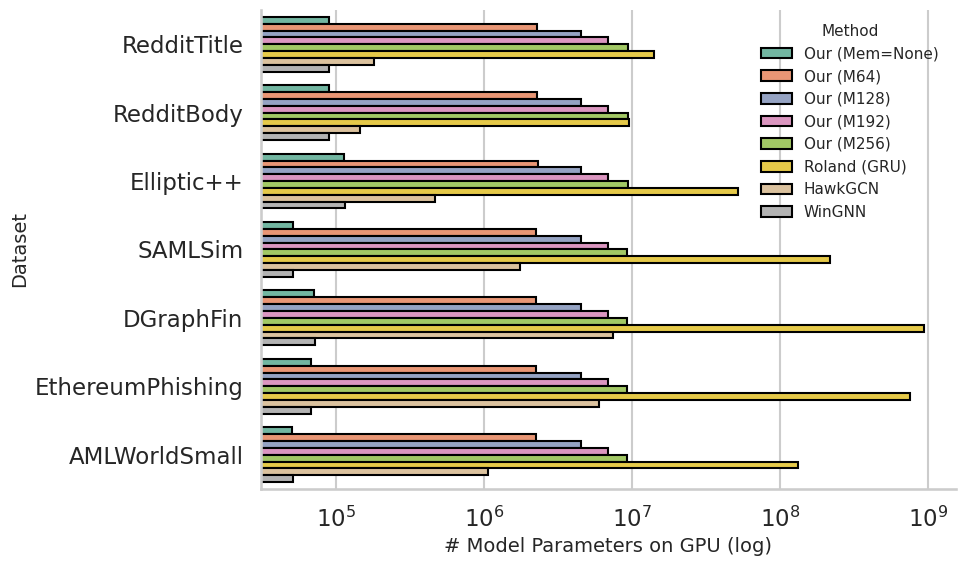

In [12]:
df = pd.DataFrame(data)

# Melt into tidy format
df_melted = df.melt(id_vars="Dataset", var_name="Method", value_name="Params")

# Correct dataset order (Ethereum before DFinGraph)
dataset_order = ["RedditTitle", "RedditBody", "Elliptic++", "SAMLSim", "DGraphFin", "EthereumPhishing","AMLWorldSmall"]
df_melted["Dataset"] = pd.Categorical(df_melted["Dataset"], categories=dataset_order, ordered=True)

# Plot
sns.set(style="whitegrid", context="talk")
palette = sns.color_palette("Set2", n_colors=len(df_melted["Method"].unique()))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    y="Dataset",
    x="Params",
    hue="Method",
    palette=palette,
    ax=ax,
    edgecolor="black"
)

ax.set_xscale("log")
ax.set_xlabel("# Model Parameters on GPU (log)", fontsize=14)
ax.set_ylabel("Dataset", fontsize=14)
ax.legend(
    title="Method",
    fontsize=11,
    title_fontsize=11,
    bbox_to_anchor=(0.7, 1),
    loc="upper left",
    frameon=False
)
sns.despine()

plt.tight_layout()
plt.show()
fig.savefig("GPU_usage.png")

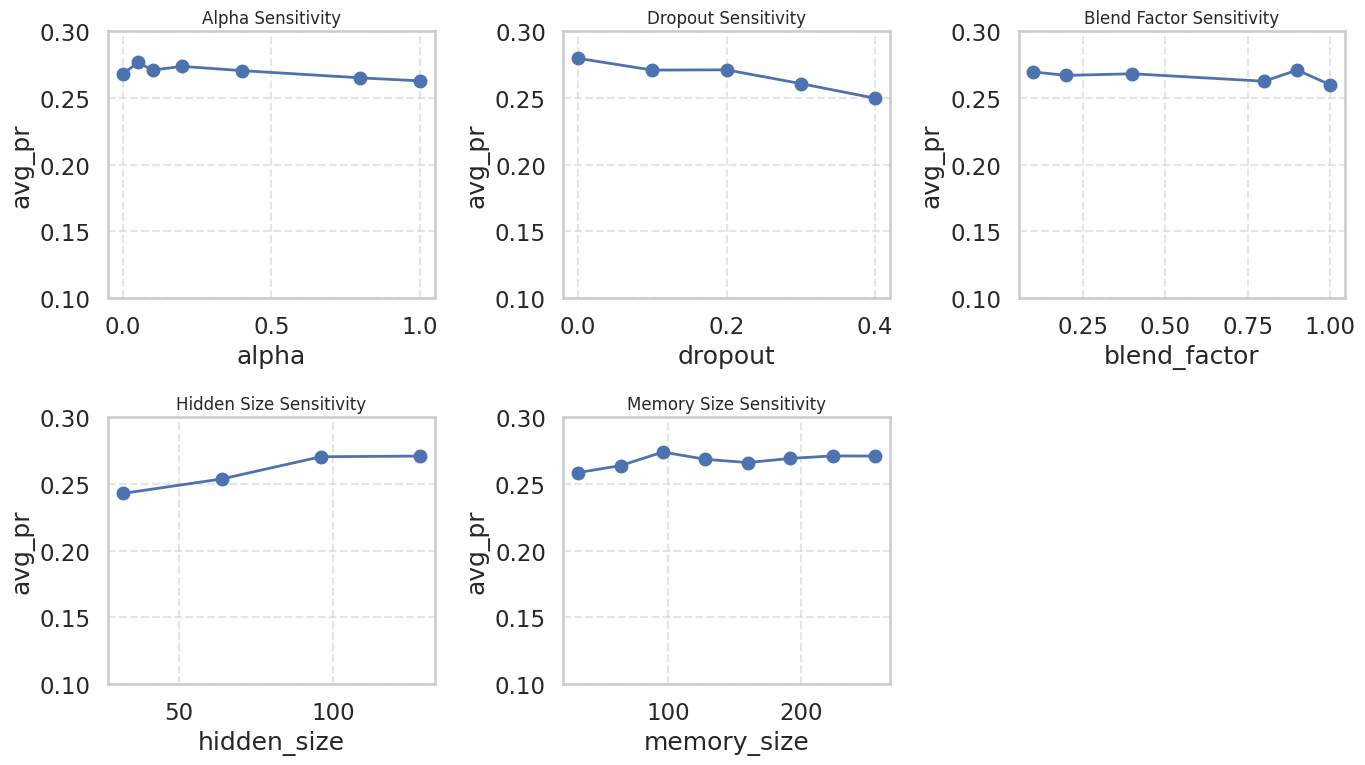

In [5]:
import matplotlib.pyplot as plt

# ================================
# 1. DATA (fresh_start=False only)
# ================================

alpha_data = {
    1.0: 0.262863,
    0.8: 0.265132,
    0.4: 0.270555,
    0.2: 0.273732,
    0.1: 0.270959,
    0.05: 0.276647,
    0.0: 0.267899
}

dropout_data = {
    0.0: 0.279748,
    0.1: 0.270959,
    0.2: 0.271135,
    0.3: 0.260806,
    0.4: 0.249869
}

blend_data = {
    1.0: 0.259945,
    0.9: 0.270959,
    0.8: 0.262578,
    0.4: 0.268196,
    0.2: 0.266968,
    0.1: 0.269552
}

hidden_data = {
    128: 0.270959,
    96: 0.270435,
    64: 0.253798,
    32: 0.242962
}

memory_data = {
    256: 0.270959,
    224: 0.271077,
    192: 0.269179,
    160: 0.266084,
    128: 0.268537,
    96: 0.273973,
    64: 0.263796,
    32: 0.258582
}

# ================================
# 2. Plotting function
# ================================

def plot_subplot(ax, title, x_label, data_dict):
    xs, ys = zip(*sorted(data_dict.items(), key=lambda t: t[0]))
    ax.plot(xs, ys, marker="o", linewidth=2)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_label)
    ax.set_ylabel("avg_pr")
    ax.set_ylim(0.1, 0.3)   # <<< FIX Y-AXIS HERE
    ax.grid(True, linestyle="--", alpha=0.5)

# ================================
# 3. Create the figure with 5 subplots
# ================================

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

plot_subplot(axs[0,0], "Alpha Sensitivity", "alpha", alpha_data)
plot_subplot(axs[0,1], "Dropout Sensitivity", "dropout", dropout_data)
plot_subplot(axs[0,2], "Blend Factor Sensitivity", "blend_factor", blend_data)
plot_subplot(axs[1,0], "Hidden Size Sensitivity", "hidden_size", hidden_data)
plot_subplot(axs[1,1], "Memory Size Sensitivity", "memory_size", memory_data)

# Hide unused subplot
axs[1,2].axis("off")

plt.tight_layout()
plt.show()


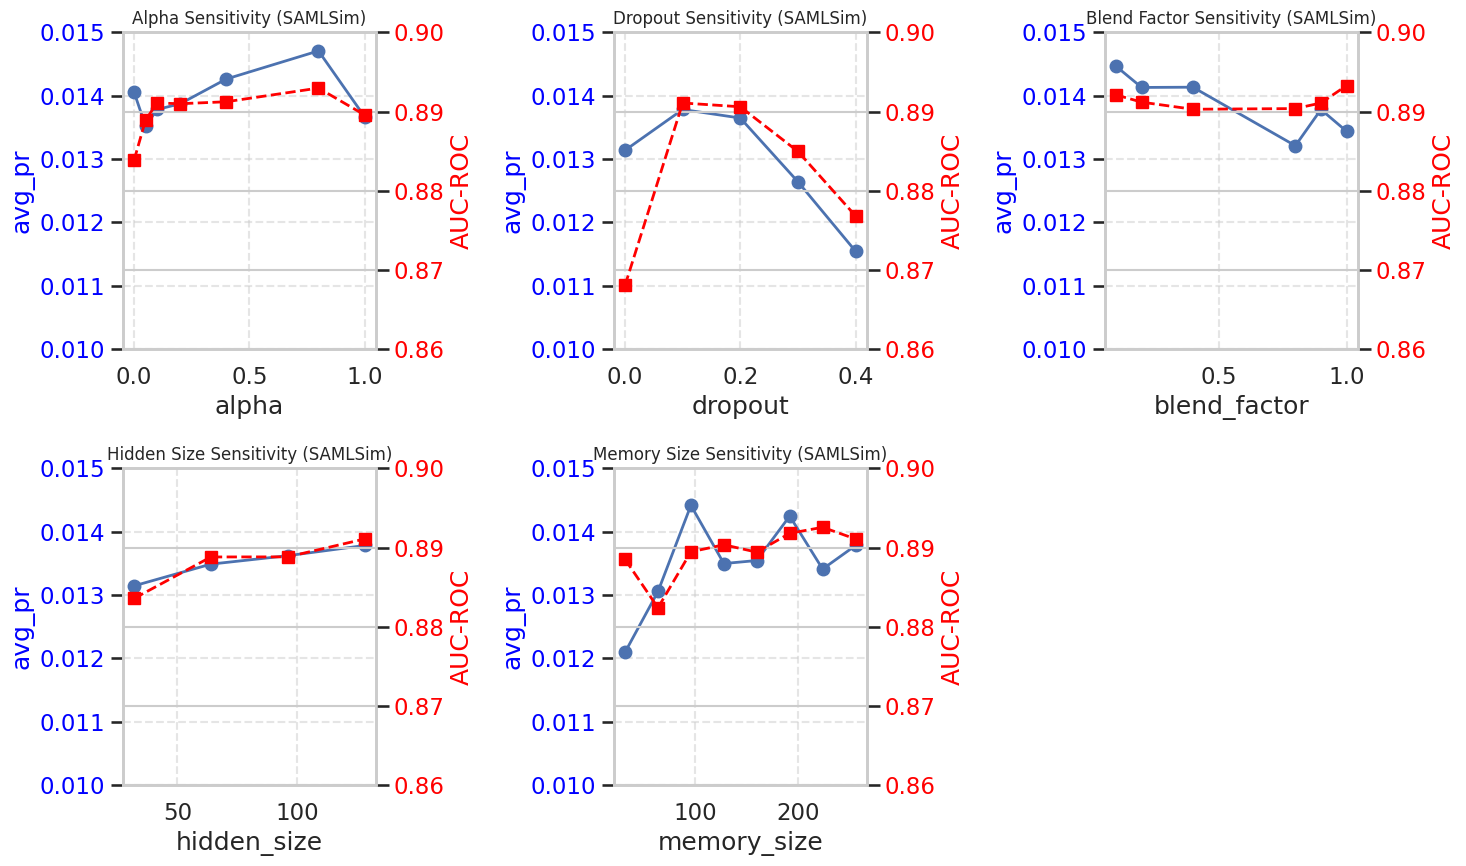

In [6]:
import matplotlib.pyplot as plt

# ================================
# SAMLSim sensitivity data (fresh_start=False only)
# ================================

alpha_data_saml_pr = {
    0.0: 0.014056,
    0.05: 0.013520,
    0.1: 0.013782,
    0.2: 0.013872,
    0.4: 0.014263,
    0.8: 0.014707,
    1.0: 0.013669
}

alpha_data_saml_auc = {
    0.0: 0.883848,
    0.05: 0.888930,
    0.1: 0.891078,
    0.2: 0.890985,
    0.4: 0.891233,
    0.8: 0.892962,
    1.0: 0.889573
}

dropout_data_saml_pr = {
    0.0: 0.013138,
    0.1: 0.013782,
    0.2: 0.013647,
    0.3: 0.012641,
    0.4: 0.011545
}

dropout_data_saml_auc = {
    0.0: 0.868061,
    0.1: 0.891078,
    0.2: 0.890599,
    0.3: 0.884956,
    0.4: 0.876817
}

blend_data_saml_pr = {
    1.0: 0.013438,
    0.9: 0.013782,
    0.8: 0.013210,
    0.4: 0.014134,
    0.2: 0.014130,
    0.1: 0.014464
}

blend_data_saml_auc = {
    1.0: 0.893274,
    0.9: 0.891078,
    0.8: 0.890372,
    0.4: 0.890288,
    0.2: 0.891181,
    0.1: 0.892101
}

hidden_data_saml_pr = {
    128: 0.013782,
    96:  0.013621,
    64:  0.013488,
    32:  0.013145
}

hidden_data_saml_auc = {
    128: 0.891078,
    96:  0.888820,
    64:  0.888807,
    32:  0.883567
}

memory_data_saml_pr = {
    256: 0.013782,
    224: 0.013410,
    192: 0.014246,
    160: 0.013545,
    128: 0.013497,
    96:  0.014416,
    64:  0.013056,
    32:  0.012097
}

memory_data_saml_auc = {
    256: 0.891078,
    224: 0.892554,
    192: 0.891793,
    160: 0.889412,
    128: 0.890348,
    96:  0.889455,
    64:  0.882393,
    32:  0.888505
}

# ================================
# Dual-axis subplot function
# ================================

def plot_dual_subplot(ax, title, x_label, data_pr, data_auc,
                      y1_min=0.010, y1_max=0.015,
                      y2_min=0.86, y2_max=0.90):

    xs, ys_pr = zip(*sorted(data_pr.items(), key=lambda t: t[0]))
    _, ys_auc = zip(*sorted(data_auc.items(), key=lambda t: t[0]))

    # Left axis: avg_pr
    ax.plot(xs, ys_pr, marker="o", linewidth=2, label="avg_pr")
    ax.set_ylabel("avg_pr", color="blue")
    ax.set_ylim(y1_min, y1_max)
    ax.tick_params(axis="y", labelcolor="blue")

    # Right axis: AUC-ROC
    ax2 = ax.twinx()
    ax2.plot(xs, ys_auc, marker="s", linewidth=2, linestyle="--", color="red", label="AUC-ROC")
    ax2.set_ylabel("AUC-ROC", color="red")
    ax2.set_ylim(y2_min, y2_max)
    ax2.tick_params(axis="y", labelcolor="red")

    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_label)
    ax.grid(True, linestyle="--", alpha=0.5)


# ================================
# 5-subplot figure
# ================================

fig, axs = plt.subplots(2, 3, figsize=(15, 9))

plot_dual_subplot(axs[0,0], "Alpha Sensitivity (SAMLSim)", "alpha",
                  alpha_data_saml_pr, alpha_data_saml_auc)

plot_dual_subplot(axs[0,1], "Dropout Sensitivity (SAMLSim)", "dropout",
                  dropout_data_saml_pr, dropout_data_saml_auc)

plot_dual_subplot(axs[0,2], "Blend Factor Sensitivity (SAMLSim)", "blend_factor",
                  blend_data_saml_pr, blend_data_saml_auc)

plot_dual_subplot(axs[1,0], "Hidden Size Sensitivity (SAMLSim)", "hidden_size",
                  hidden_data_saml_pr, hidden_data_saml_auc)

plot_dual_subplot(axs[1,1], "Memory Size Sensitivity (SAMLSim)", "memory_size",
                  memory_data_saml_pr, memory_data_saml_auc)

axs[1,2].axis("off")

plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt

# ============================================================
# ELLIPTIC++ SENSITIVITY DATA (fresh_start = False only)
# ============================================================

alpha_ell_pr = {
    1.0: 0.272226,
    0.8: 0.274571,
    0.4: 0.280015,
    0.2: 0.283105,
    0.1: 0.273309,
    0.05: 0.285890,
    0.0: 0.277196,
}
alpha_ell_auc = {
    1.0: 0.804156,
    0.8: 0.805671,
    0.4: 0.811181,
    0.2: 0.819603,
    0.1: 0.815386,
    0.05: 0.821466,
    0.0: 0.810130,
}

dropout_ell_pr = {
    0.0: 0.288940,
    0.1: 0.280311,
    0.2: 0.280634,
    0.3: 0.270335,
    0.4: 0.259439,
}
dropout_ell_auc = {
    0.0: 0.810441,
    0.1: 0.816665,
    0.2: 0.816455,
    0.3: 0.813103,
    0.4: 0.798127,
}

blend_ell_pr = {
    1.0: 0.287374,
    0.9: 0.280311,
    0.8: 0.271939,
    0.4: 0.277464,
    0.2: 0.276341,
    0.1: 0.278937,
}
blend_ell_auc = {
    1.0: 0.818897,
    0.9: 0.816665,
    0.8: 0.806140,
    0.4: 0.817051,
    0.2: 0.816466,
    0.1: 0.820093,
}

hidden_ell_pr = {
    128: 0.280311,
    96:  0.279771,
    64:  0.263463,
    32:  0.252801,
}
hidden_ell_auc = {
    128: 0.816665,
    96:  0.816706,
    64:  0.810591,
    32:  0.805900,
}

memory_ell_pr = {
    256: 0.280311,
    224: 0.280409,
    192: 0.278529,
    160: 0.275415,
    128: 0.277867,
    96:  0.273269,
    64:  0.273269,
    32:  0.268114,
}
memory_ell_auc = {
    256: 0.816665,
    224: 0.819343,
    192: 0.812639,
    160: 0.798758,
    128: 0.805696,
    96:  0.805151,
    64:  0.805151,
    32:  0.803198,
}

# ============================================================
# SAMLSIM SENSITIVITY (fresh_start = False only)
# ============================================================

alpha_saml_pr = {
    0.0: 0.014056,
    0.05: 0.013520,
    0.1: 0.013782,
    0.2: 0.013872,
    0.4: 0.014263,
    0.8: 0.014707,
    1.0: 0.013669
}
alpha_saml_auc = {
    0.0: 0.883848,
    0.05: 0.888930,
    0.1: 0.891078,
    0.2: 0.890985,
    0.4: 0.891233,
    0.8: 0.892962,
    1.0: 0.889573
}

dropout_saml_pr = {
    0.0: 0.013138,
    0.1: 0.013782,
    0.2: 0.013647,
    0.3: 0.012641,
    0.4: 0.011545
}
dropout_saml_auc = {
    0.0: 0.868061,
    0.1: 0.891078,
    0.2: 0.890599,
    0.3: 0.884956,
    0.4: 0.876817
}

blend_saml_pr = {
    1.0: 0.013438,
    0.9: 0.013782,
    0.8: 0.013210,
    0.4: 0.014134,
    0.2: 0.014130,
    0.1: 0.014464
}
blend_saml_auc = {
    1.0: 0.893274,
    0.9: 0.891078,
    0.8: 0.890372,
    0.4: 0.890288,
    0.2: 0.891181,
    0.1: 0.892101
}

hidden_saml_pr = {
    128: 0.013782,
    96:  0.013621,
    64:  0.013488,
    32:  0.013145
}
hidden_saml_auc = {
    128: 0.891078,
    96:  0.888820,
    64:  0.888807,
    32:  0.883567
}

memory_saml_pr = {
    256: 0.013782,
    224: 0.013410,
    192: 0.014246,
    160: 0.013545,
    128: 0.013497,
    96:  0.014416,
    64:  0.013056,
    32:  0.012097
}
memory_saml_auc = {
    256: 0.891078,
    224: 0.892554,
    192: 0.891793,
    160: 0.889412,
    128: 0.890348,
    96:  0.889455,
    64:  0.882393,
    32:  0.888505
}


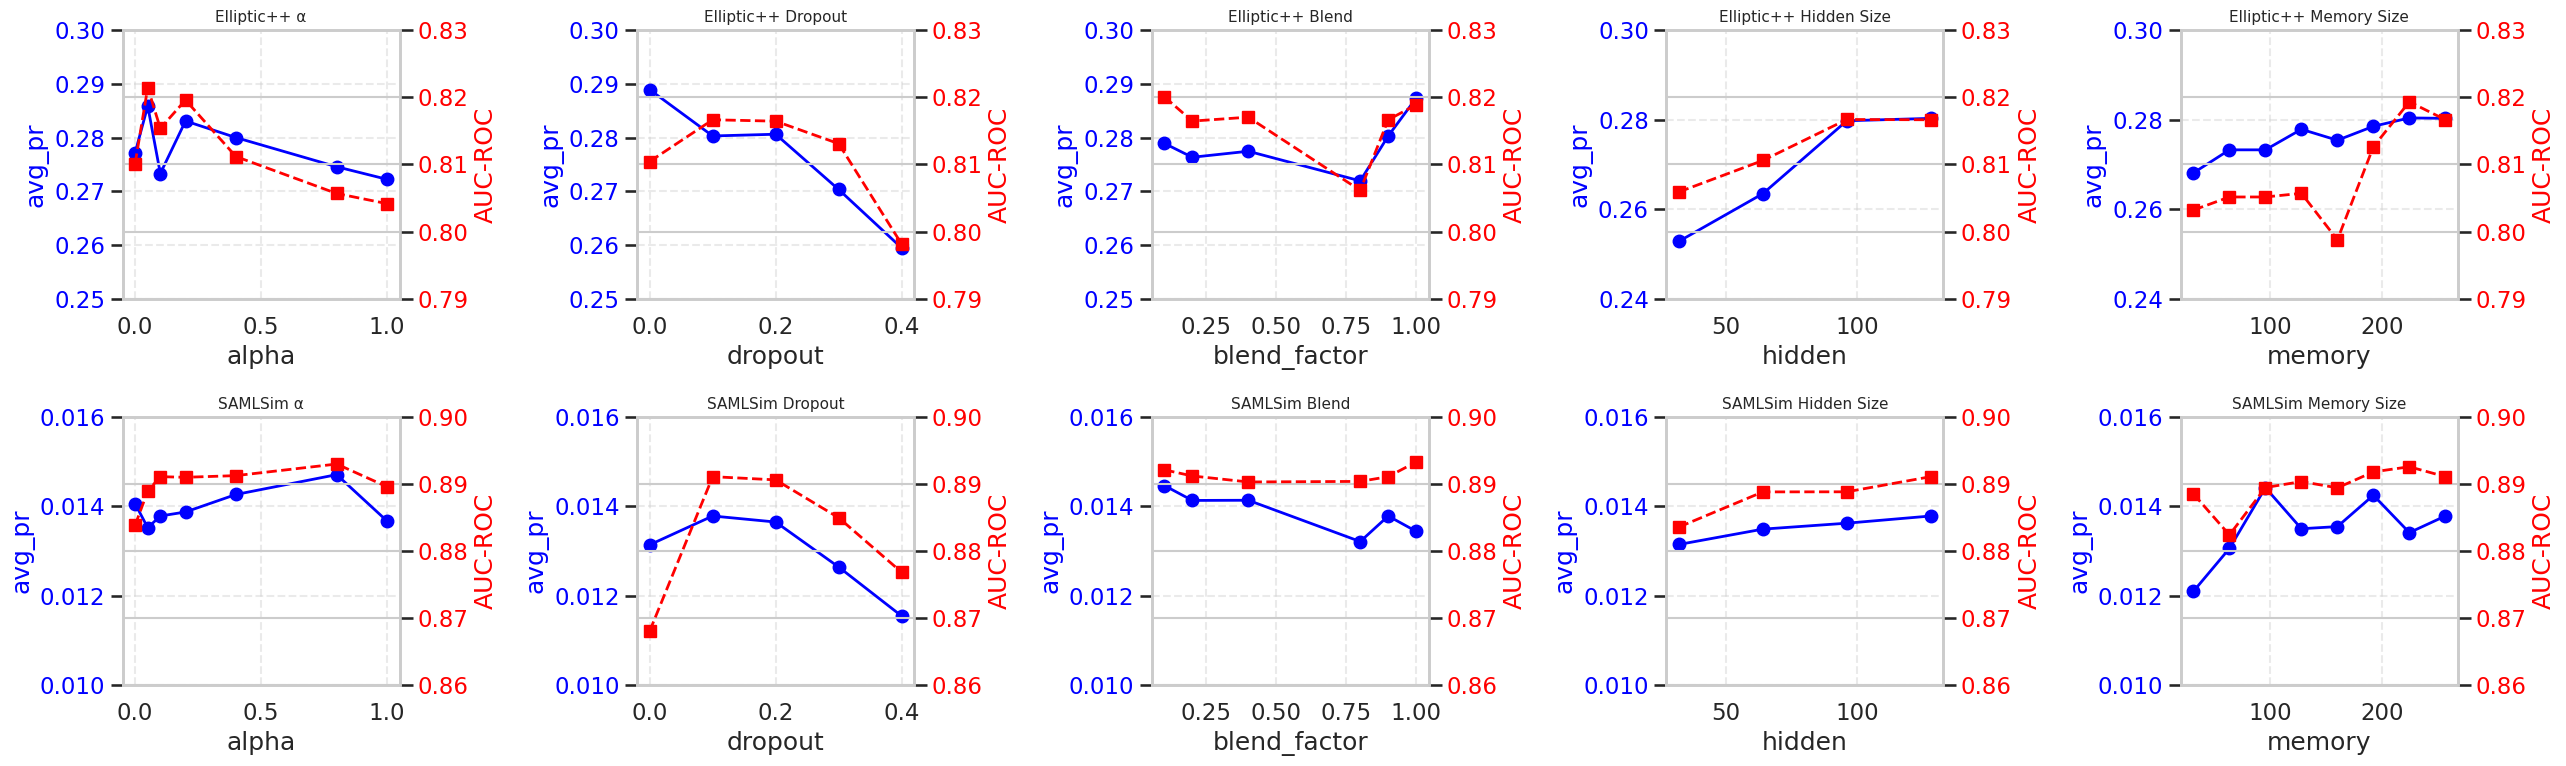

In [8]:
import matplotlib.pyplot as plt

def plot_dual(ax, title, xlab, pr_dict, auc_dict,
              pr_min=None, pr_max=None,
              auc_min=None, auc_max=None):

    xs, ys_pr = zip(*sorted(pr_dict.items()))
    _, ys_auc = zip(*sorted(auc_dict.items()))

    # avg_pr curve (left axis)
    ax.plot(xs, ys_pr, marker='o', color='blue', linewidth=2)
    ax.set_ylabel("avg_pr", color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    if pr_min is not None:
        ax.set_ylim(pr_min, pr_max)

    # AUC-ROC curve (right axis)
    ax2 = ax.twinx()
    ax2.plot(xs, ys_auc, marker='s', linestyle='--', color='red', linewidth=2)
    ax2.set_ylabel("AUC-ROC", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    if auc_min is not None:
        ax2.set_ylim(auc_min, auc_max)

    ax.set_title(title, fontsize=11)
    ax.set_xlabel(xlab)
    ax.grid(True, linestyle='--', alpha=0.4)


# ============================================================
# CREATE ONE FIGURE: 2 ROWS × 5 COLUMNS = 10 SUBPLOTS
# ============================================================

fig, axs = plt.subplots(2, 5, figsize=(26, 8))

# ============================================================
# ROW 1 — ELLIPTIC++
# ============================================================

plot_dual(axs[0,0], "Elliptic++ α", "alpha",
          alpha_ell_pr, alpha_ell_auc,
          0.25, 0.30, 0.79, 0.83)

plot_dual(axs[0,1], "Elliptic++ Dropout", "dropout",
          dropout_ell_pr, dropout_ell_auc,
          0.25, 0.30, 0.79, 0.83)

plot_dual(axs[0,2], "Elliptic++ Blend", "blend_factor",
          blend_ell_pr, blend_ell_auc,
          0.25, 0.30, 0.79, 0.83)

plot_dual(axs[0,3], "Elliptic++ Hidden Size", "hidden",
          hidden_ell_pr, hidden_ell_auc,
          0.24, 0.30, 0.79, 0.83)

plot_dual(axs[0,4], "Elliptic++ Memory Size", "memory",
          memory_ell_pr, memory_ell_auc,
          0.24, 0.30, 0.79, 0.83)

# ============================================================
# ROW 2 — SAMLSim
# ============================================================

plot_dual(axs[1,0], "SAMLSim α", "alpha",
          alpha_saml_pr, alpha_saml_auc,
          0.010, 0.016, 0.86, 0.90)

plot_dual(axs[1,1], "SAMLSim Dropout", "dropout",
          dropout_saml_pr, dropout_saml_auc,
          0.010, 0.016, 0.86, 0.90)

plot_dual(axs[1,2], "SAMLSim Blend", "blend_factor",
          blend_saml_pr, blend_saml_auc,
          0.010, 0.016, 0.86, 0.90)

plot_dual(axs[1,3], "SAMLSim Hidden Size", "hidden",
          hidden_saml_pr, hidden_saml_auc,
          0.010, 0.016, 0.86, 0.90)

plot_dual(axs[1,4], "SAMLSim Memory Size", "memory",
          memory_saml_pr, memory_saml_auc,
          0.010, 0.016, 0.86, 0.90)

plt.tight_layout()
plt.savefig("Hyper_sens_ellipticpp_SAMLSim.png")
plt.show()


In [13]:
import pandas as pd

rows = [
    # Dataset 1: Elliptic++
    {"Dataset": "Elliptic++", "Method": "Our (Mem=False)", "Train_per_Epoch_ms": 14.682109131374268, "Inference_ms": 0},
    {"Dataset": "Elliptic++", "Method": "Our (Mem=True)",  "Train_per_Epoch_ms": 51.52219701019338,  "Inference_ms": 0},
    {"Dataset": "Elliptic++", "Method": "Roland (GRU)",    "Train_per_Epoch_ms": 34.53625634079218,  "Inference_ms": 0},
    {"Dataset": "Elliptic++", "Method": "HawkGCN",         "Train_per_Epoch_ms": 19.597883619591035, "Inference_ms": 0},
    {"Dataset": "Elliptic++", "Method": "WinGNN",          "Train_per_Epoch_ms": 125.64974591934255, "Inference_ms": 0},

    # Dataset 2: SAMLSim
    {"Dataset": "SAMLSim", "Method": "Our (Mem=False)", "Train_per_Epoch_ms": 32.269560752643464, "Inference_ms": 0},
    {"Dataset": "SAMLSim", "Method": "Our (Mem=True)",  "Train_per_Epoch_ms": 41.05487444212757,  "Inference_ms": 0},
    {"Dataset": "SAMLSim", "Method": "Roland (GRU)",    "Train_per_Epoch_ms": 0,                  "Inference_ms": 0},
    {"Dataset": "SAMLSim", "Method": "HawkGCN",         "Train_per_Epoch_ms": 42.661041378999696, "Inference_ms": 0},
    {"Dataset": "SAMLSim", "Method": "WinGNN",          "Train_per_Epoch_ms": 221.31633427376166, "Inference_ms": 0},
]


df_time = pd.DataFrame(rows)
df_time

,Dataset,Method,Train_per_Epoch_ms,Inference_ms
0,Elliptic++,Our (Mem=False),14.682109,0
1,Elliptic++,Our (Mem=True),51.522197,0
2,Elliptic++,Roland (GRU),34.536256,0
3,Elliptic++,HawkGCN,19.597884,0
4,Elliptic++,WinGNN,125.649746,0
5,SAMLSim,Our (Mem=False),32.269561,0
6,SAMLSim,Our (Mem=True),41.054874,0
7,SAMLSim,Roland (GRU),0.000000,0
8,SAMLSim,HawkGCN,42.661041,0
9,SAMLSim,WinGNN,221.316334,0


/tmp/ipykernel_653085/3372312252.py:23: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(


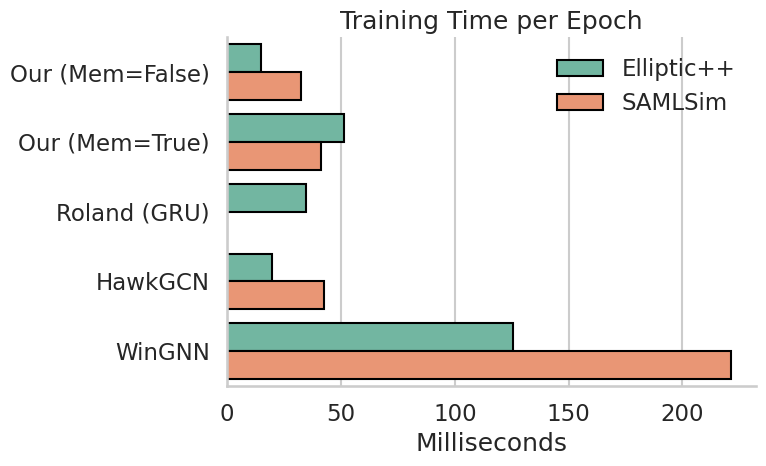

/tmp/ipykernel_653085/3372312252.py:49: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(


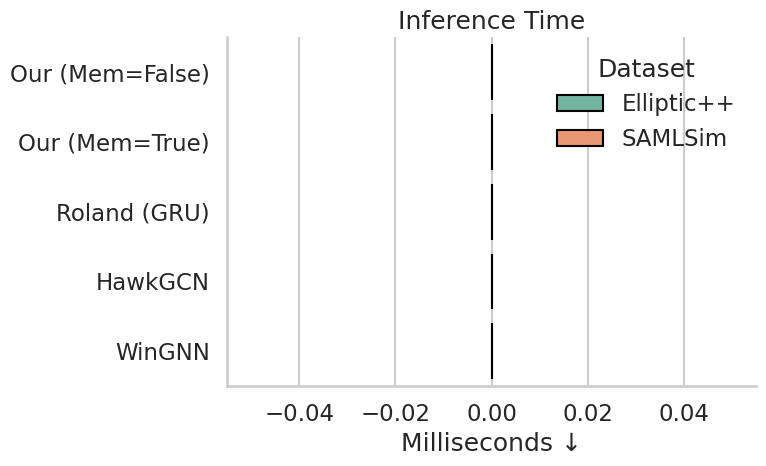

In [20]:
df_melted = df_time.melt(
    id_vars=["Dataset", "Method"],
    var_name="Metric",
    value_name="Time"
)

df_melted["Metric"] = df_melted["Metric"].replace({
    "Train_per_Epoch_ms": "Training Time / Epoch (ms)",
    "Inference_ms": "Inference Time (ms)"
})

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")
palette = sns.color_palette("Set2")

# =========================
# (a) Training time figure
# =========================
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df_melted[df_melted["Metric"] == "Training Time / Epoch (ms)"],
    x="Time",
    y="Method",
    hue="Dataset",
    palette=palette,
    edgecolor="black"
)

plt.title("Training Time per Epoch")
plt.xlabel("Milliseconds")
plt.ylabel("")
plt.legend(title="", frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("training_time_per_epoch.png", dpi=300, bbox_inches="tight")
plt.savefig("time_per_epoch_Ellipticpp_SAMLSim.png")
plt.show()


# =========================
# (b) Inference time figure
# =========================
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df_melted[df_melted["Metric"] == "Inference Time (ms)"],
    x="Time",
    y="Method",
    hue="Dataset",
    palette=palette,
    edgecolor="black"
)

plt.title("Inference Time")
plt.xlabel("Milliseconds ↓")
plt.ylabel("")
plt.legend(title="Dataset", frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("inference_time.png", dpi=300, bbox_inches="tight")
plt.savefig("inference_time_Ellipticpp_SAMLSim.png")
plt.show()
